In [7]:
from numpy import *
import numpy as np
import operator

In [3]:
def createDataSet():
    group = np.array([[1.0 , 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

In [46]:
#dataSet 是数据集
#inX 是待分类的数据
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    sortedDistance = distance.argsort()
    classCount = {}
    for i in range (k):
        voteIlabel = labels[sortedDistance[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [13]:
classify0([0, 0], group, labels, 3)

[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
[ 2.21  2.    0.    0.01]


'B'

In [37]:
def file2Martix(fileName):
    fr = open(fileName)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    print(numberOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = [ ]
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromeLine = line.split('\t')
        returnMat[index, :] = listFromeLine[0:3]
        classLabelVector.append(int(listFromeLine[-1]))
        index += 1
    return returnMat, classLabelVector 

In [38]:
dateingDataMat, datingLabels = file2Martix("./datingTestSet2.txt")

1000


In [11]:
import matplotlib
import matplotlib.pyplot as plt

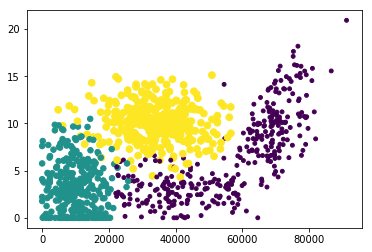

In [17]:
fig = plt.figure()
#ax  = fig.add_subplot(121)
ax1 = fig.add_subplot(111)
#ax.scatter(dateingDataMat[:,1], dateingDataMat[:, 2], 15.0*array(datingLabels), 15.0*array(datingLabels))
#ax.scatter(dateingDataMat[:,1], dateingDataMat[:, 2])
ax1.scatter(dateingDataMat[:,0], dateingDataMat[:, 1], 15.0*array(datingLabels), 15.0*array(datingLabels))

plt.show()
    

In [29]:
def auto(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    rangs = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    normDataSet = normDataSet / tile(rangs, (m, 1))
    return normDataSet, rangs, minVals

In [30]:
normMat, ranges, minVals = auto(dateingDataMat)

In [31]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [66]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2Martix("./datingTestSet2.txt")
    normMat, ranges, minVals = auto(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m , ], datingLabels[numTestVecs:m], 3)
        print ("the classifier came back with %d the real answer is %d\n" %(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1
        print ("The total error rate is %f\n" % (errorCount / float(numTestVecs)))

In [67]:
datingClassTest()

1000
the classifier came back with 3 the real answer is 3

The total error rate is 0.000000

the classifier came back with 2 the real answer is 2

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back with 3 the real answer is 3

The total error rate is 0.000000

the classifier came back with 3 the real answer is 3

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back with 3 the real answer is 3

The total error rate is 0.000000

the classifier came back with 1 the real answer is 1

The total error rate is 0.000000

the classifier came back wi